In [19]:
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

#model developemnt libraries
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.model_selection import RepeatedStratifiedKFold
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import  make_pipeline

# Pickle for saving model files
import pickle

# For standardization
from sklearn.preprocessing  import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data = data.drop(['Id','BUTTER'],axis=1)

In [6]:
y = data['signal']
X = data.drop(['signal'],axis=1)

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size = 0.25,
                                                     random_state = 1234, 
                                                     stratify = data['signal'])
# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

159496 53166
159496 53166


In [15]:
# Pipeline dictionary
pipelines = {
#     'l1': make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2',random_state=123)),
    'nb': make_pipeline(StandardScaler(),
                        GaussianNB())
}

In [10]:
pipelines['nb'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('gaussiannb', GaussianNB())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gaussiannb': GaussianNB(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gaussiannb__priors': None,
 'gaussiannb__var_smoothing': 1e-09}

In [21]:
# Boosted Tree hyperparameters
nb_hyperparameters = {
    'gaussiannb__var_smoothing': np.logspace(0,-9, num=100)
}

# Create hyperparameters dictionary
hyperparameters = {
                  'nb': nb_hyperparameters}

In [22]:
cv_method=RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [23]:
# Create empty dictionary called fitted_models
fitted_models = {}
start_time = time.time()

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = cv_method, n_jobs=-1,verbose=11)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{0} has been fitted'.format(name))
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   14.6s
[Paralle

[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   25.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:   36.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 553 tasks      | elapsed:   46.4s
[Paralle

[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:   57.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:  1.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1083 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1087 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1211 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1212 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1213 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1214 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1215 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1217 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1343 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1345 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1347 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1350 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1474 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1475 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1477 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.0min finished


nb has been fitted
--- 121.27539014816284 seconds ---


In [24]:
# Display best_score_ for each fitted model
for name,model in fitted_models.items():
    print(name, "Score: ", model.best_score_)

nb Score:  0.7139092437229142


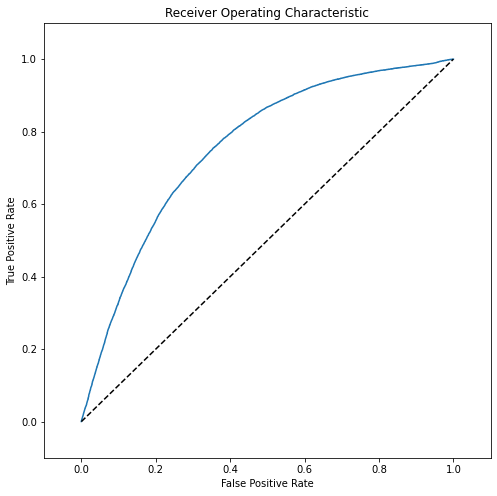

In [25]:
#Predict PROBABILITIES
pred = fitted_models['nb'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred]
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# Code here

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))

nb 0.7585937970358834


In [28]:
model = fitted_models['nb'].best_estimator_

In [29]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB(var_smoothing=0.533669923120631))])